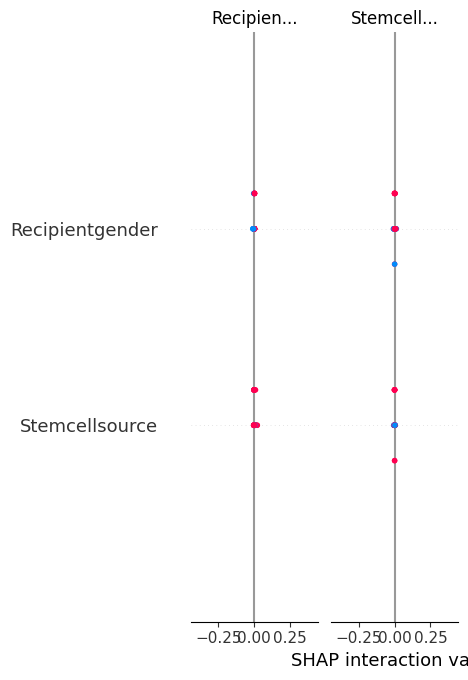

In [ ]:
!pip install shap
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap

# Function to load dataset
def load_ucimlrepo_dataset() -> pd.DataFrame:
    # Fetch dataset
    bone_marrow_transplant_children = fetch_ucirepo(id=565)

    # Extract features and target variable
    X = bone_marrow_transplant_children.data.features
    y = bone_marrow_transplant_children.data.targets

    # Convert to DataFrame
    df = pd.DataFrame(X)
    df["survival_status"] = y

    return df

# Load dataset
df = load_ucimlrepo_dataset()

# Encode categorical variables if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['survival_status'])  # Features
y = df['survival_status']  # Target

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Create SHAP summary plot
shap.summary_plot(shap_values, X_test)